<a href="https://colab.research.google.com/github/12345rupali/LGMVIP--DataScience_Task2/blob/main/Prediction_Using_Decision_Tree_Algorithm_(LGM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 2 Prediction Using Decision Tree Algorithm(LetsGrowMore)**

**By:- Rupali Rakhunde**

**Import all the necessary independencies**

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

**Read the dataset i.e iris**

In [24]:
df=pd.read_csv("https://raw.githubusercontent.com/12345rupali/LGMVIP--DataScience-Task_1/main/iris%20(1).csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
df.sample(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
55,5.7,2.8,4.5,1.3,versicolor
28,5.2,3.4,1.4,0.2,setosa
102,7.1,3.0,5.9,2.1,virginica
129,7.2,3.0,5.8,1.6,virginica
91,6.1,3.0,4.6,1.4,versicolor


In [26]:
#see the shape 

df.shape

(150, 5)

In [27]:
#ensure that any missing value is their

df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [29]:
#getting info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
#see the more details of dataset

df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
#correlation between columns

df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


**Plotting the Garaph**

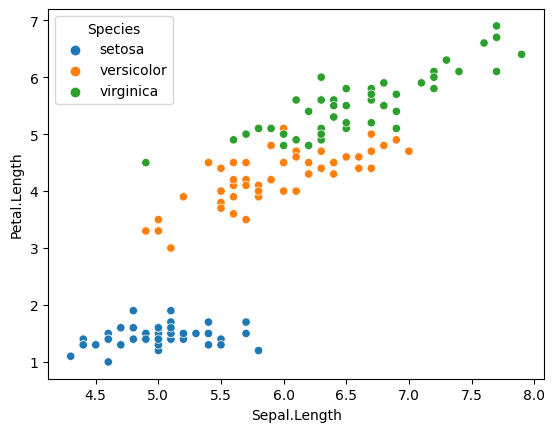

In [32]:
sns.scatterplot(x='Sepal.Length',y='Petal.Length',data=df,hue='Species')
plt.show()

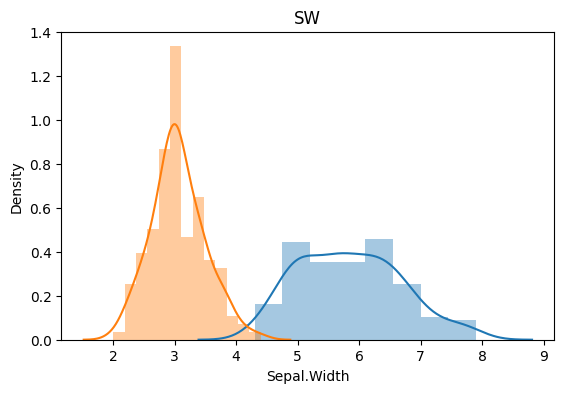

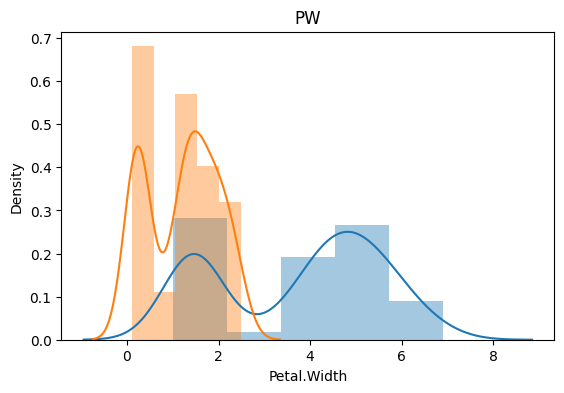

In [56]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Sepal.Length'])
plt.title('SP')

plt.subplot(121)
sns.distplot(df['Sepal.Width'])
plt.title('SW')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Petal.Length'])
plt.title('PL')

plt.subplot(121)
sns.distplot(df['Petal.Width'])
plt.title('PW')

#plt.show()
plt.show()

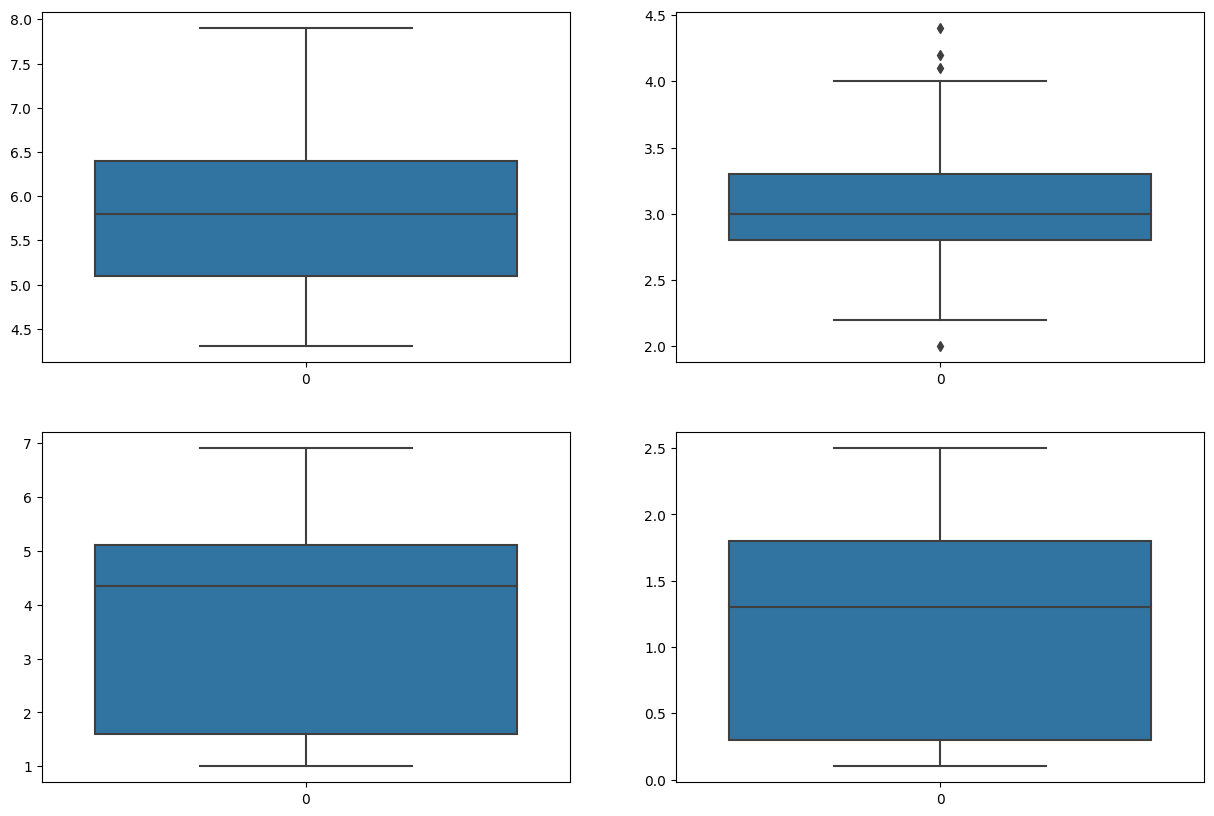

In [65]:
#detecting  for outliars

cols = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']

plt.figure(figsize=(15,10))
plt.subplot(221)
sns.boxplot(df[cols[0]])
plt.subplot(222)
sns.boxplot(df[cols[1]])
plt.subplot(223)
sns.boxplot(df[cols[2]])
plt.subplot(224)
sns.boxplot(df[cols[3]])
plt.show()

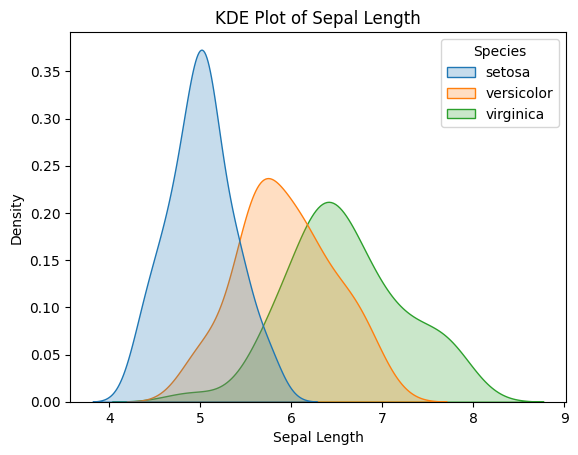

In [62]:
sns.kdeplot(data=df, x="Sepal.Length", hue="Species", fill=True)
plt.title("KDE Plot of Sepal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Density")
plt.show()


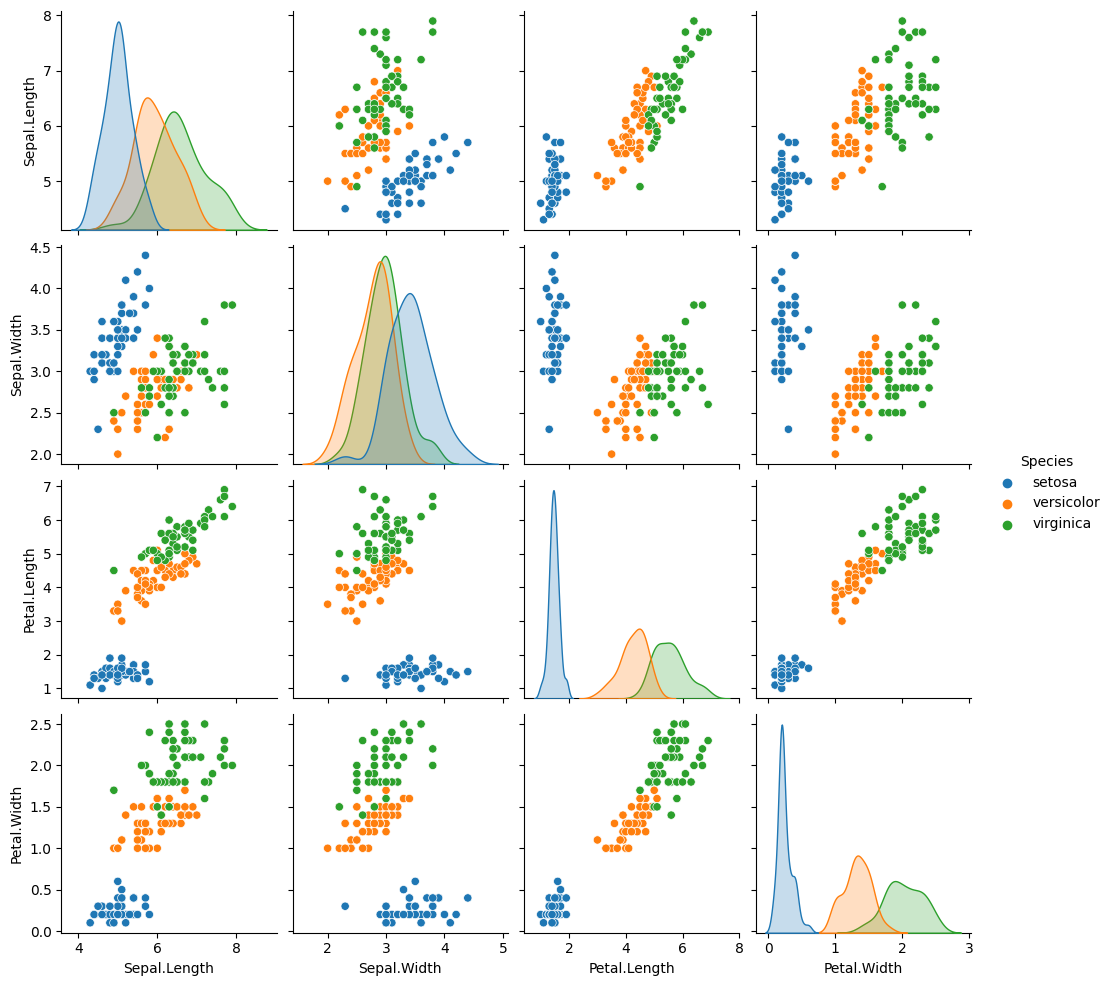

In [33]:
sns.pairplot(df,hue='Species');

**Train Test Splitting**

In [28]:
X = df.drop(['Species'],axis=1)
y = df['Species']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [34]:
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
126,6.2,2.8,4.8,1.8
79,5.7,2.6,3.5,1.0
22,4.6,3.6,1.0,0.2
139,6.9,3.1,5.4,2.1
74,6.4,2.9,4.3,1.3


In [35]:
y_test.head()

149     virginica
84     versicolor
40         setosa
66     versicolor
106     virginica
Name: Species, dtype: object

In [36]:
X_test.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
149,5.9,3.0,5.1,1.8
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
66,5.6,3.0,4.5,1.5
106,4.9,2.5,4.5,1.7


**Applying Decision Tree algorithm**

In [81]:
#Using Decision Tree

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

**Checking Accuracy and Cross Valuation**

In [82]:
acc = (accuracy_score(y_test,y_pred))
print((acc)*100)

100.0


In [84]:
#checking for cross valuation 

np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.96

In [79]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Data visualization**

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

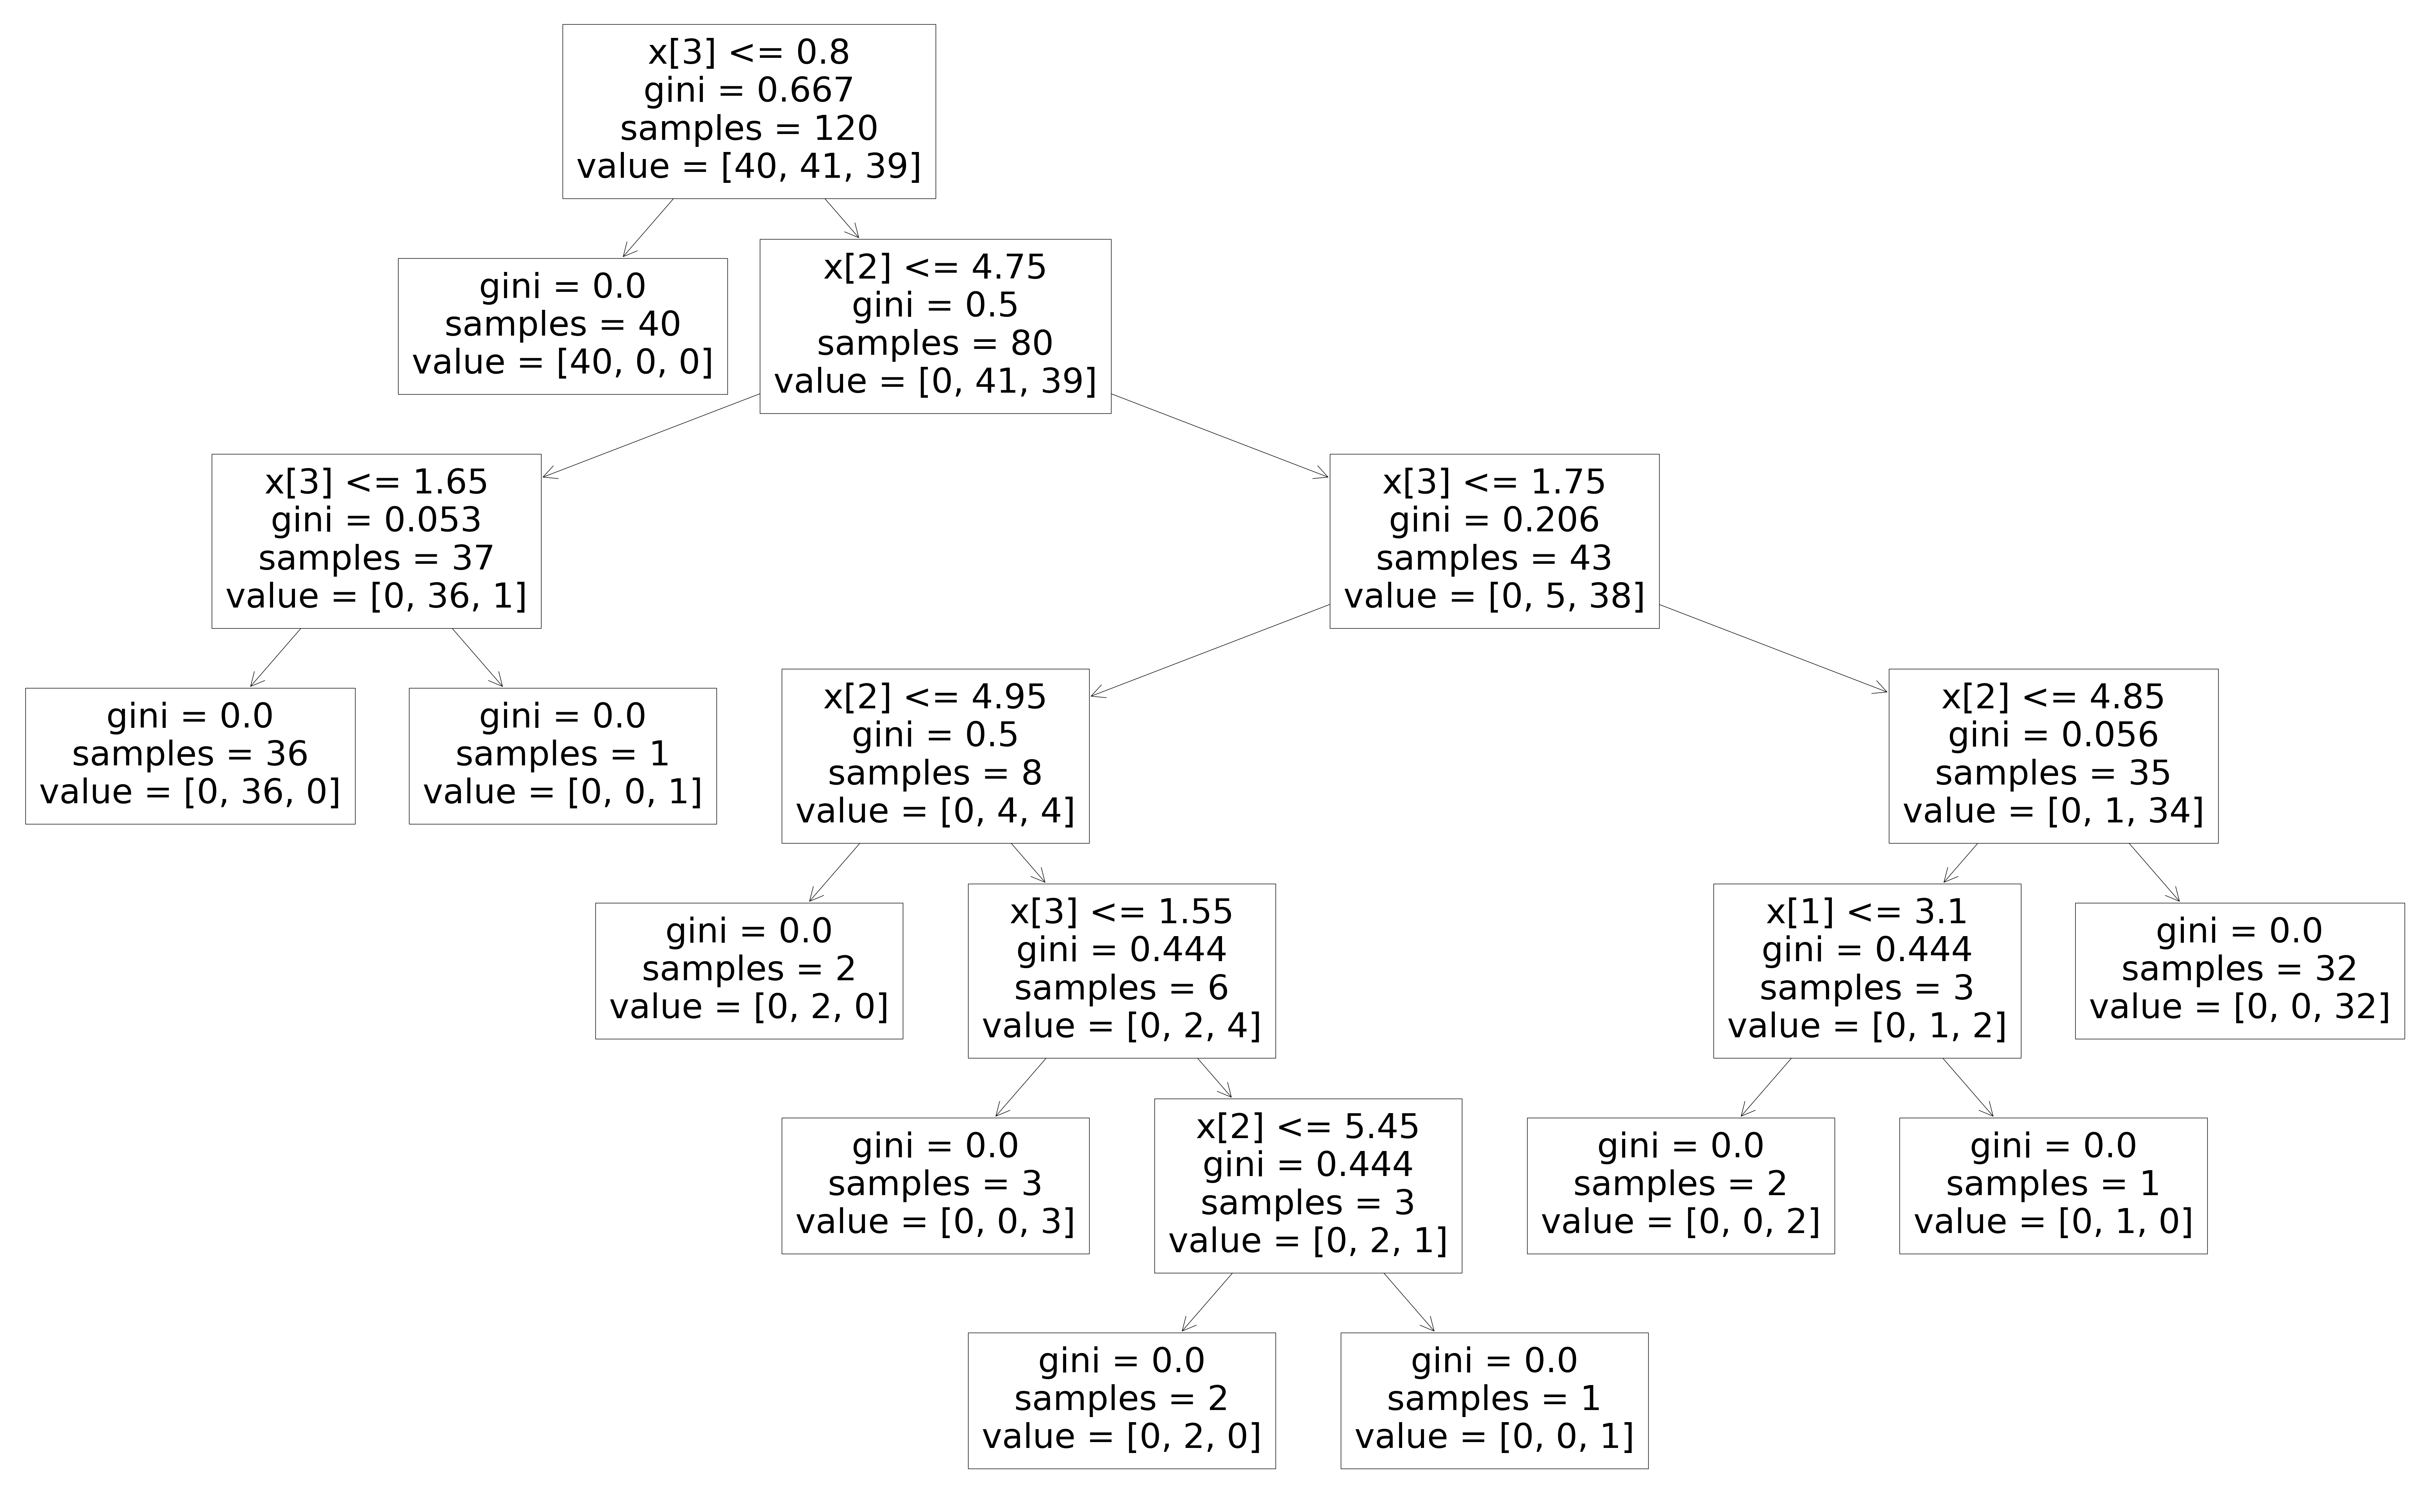

In [106]:
#By using sklearn library 

from sklearn.tree import plot_tree

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=80,50

plot_tree(dt)

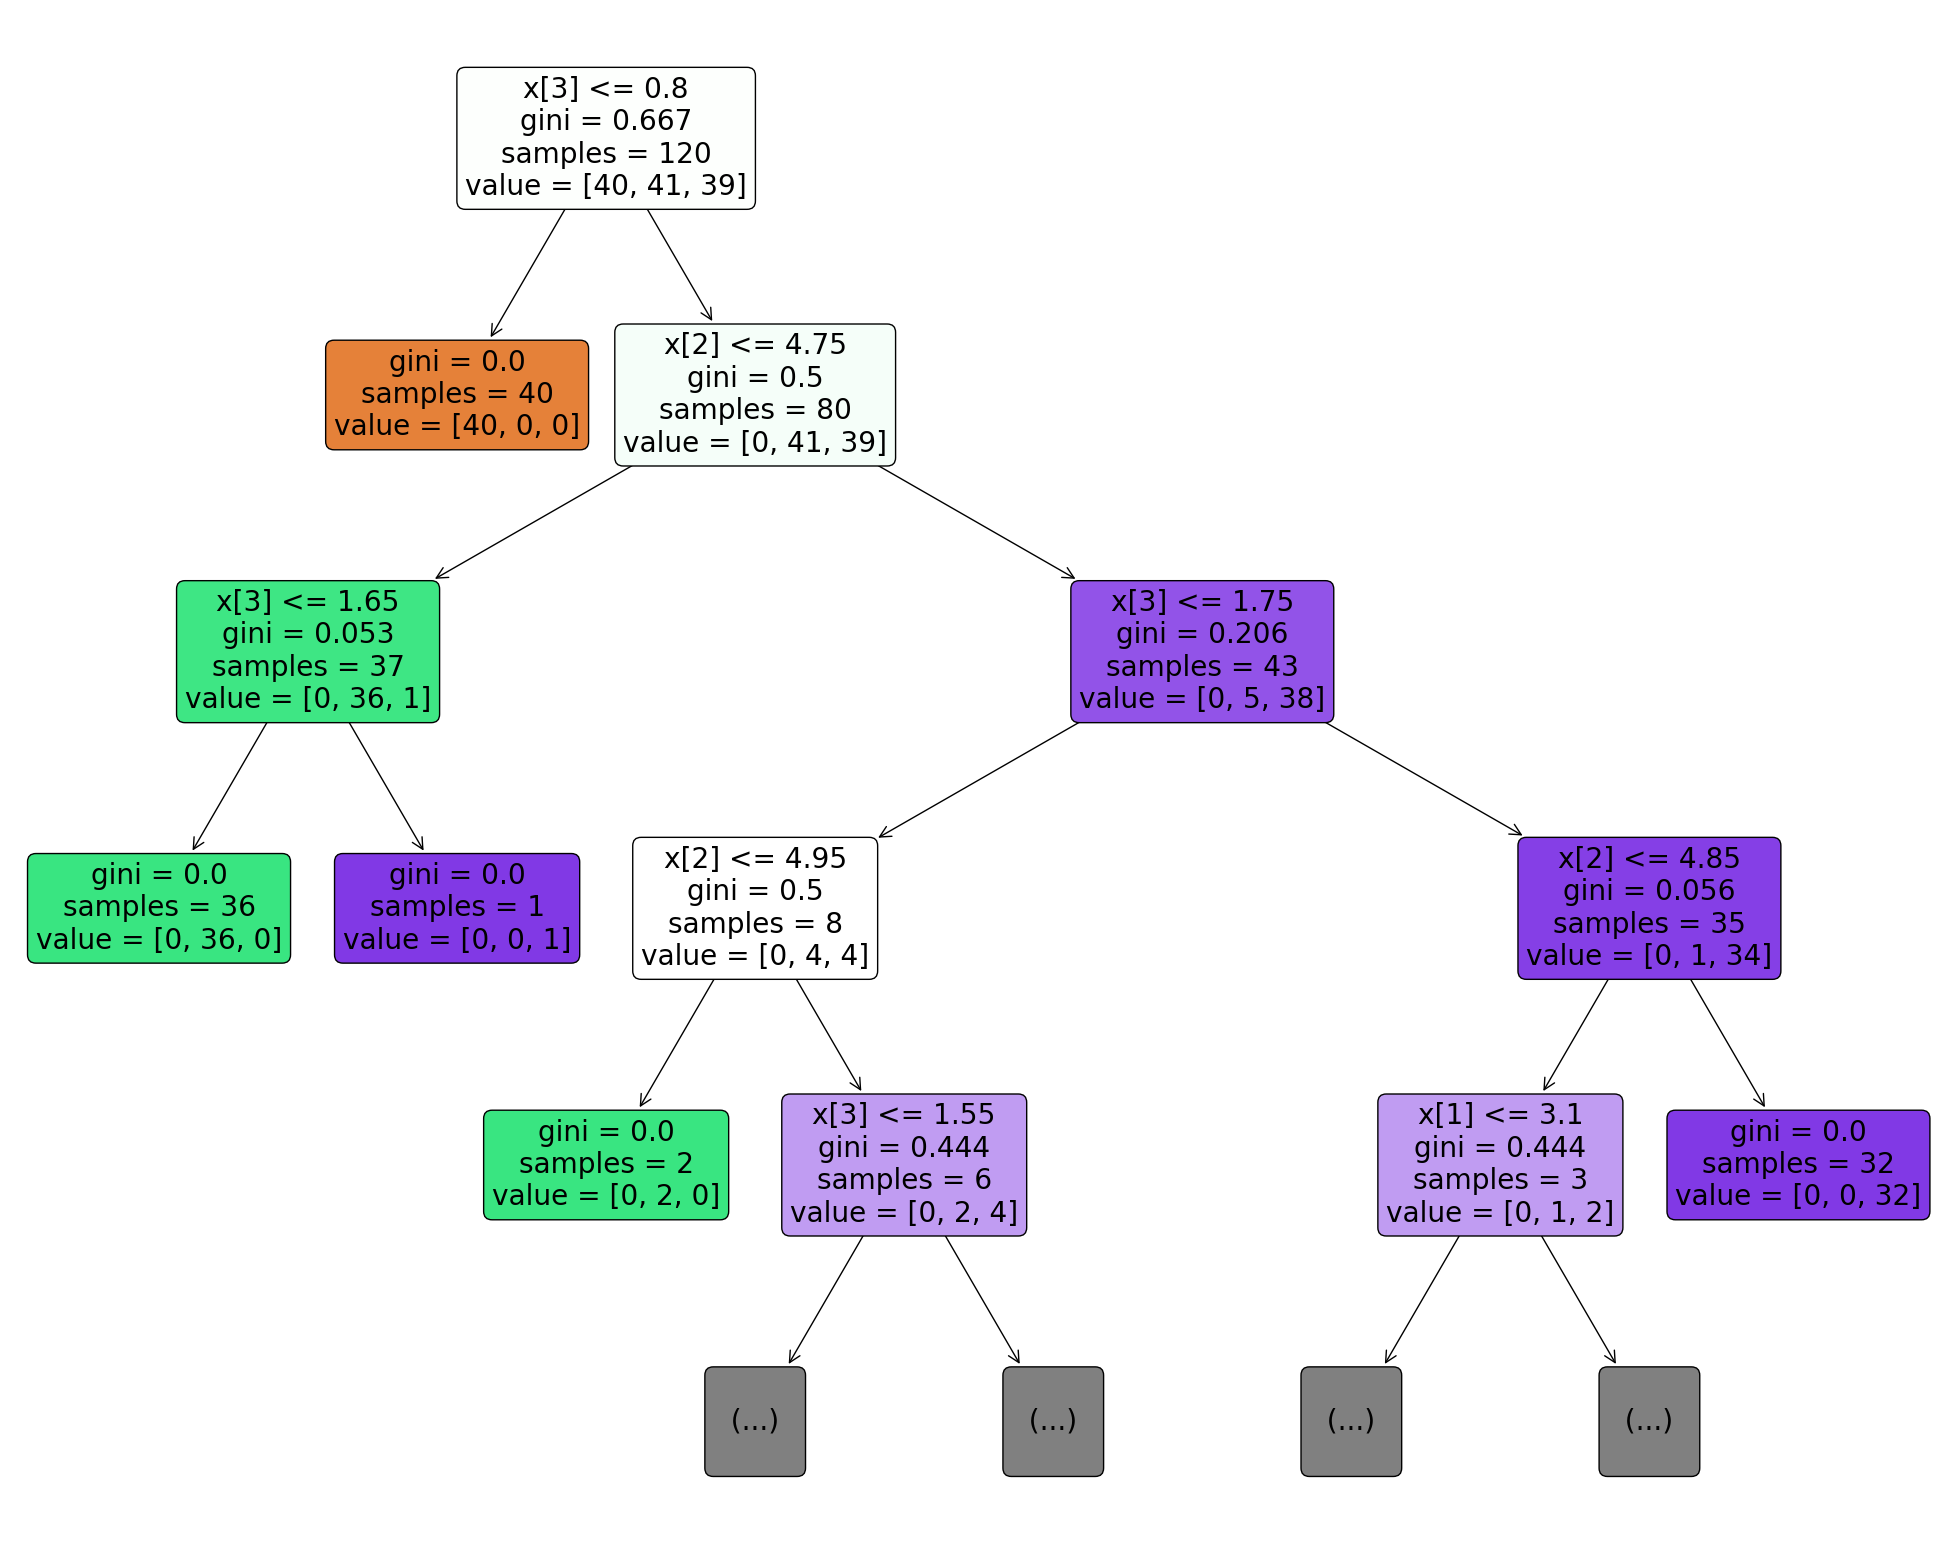

In [97]:
from sklearn import tree
fig=plt.figure(figsize=(25,20))
tree.plot_tree(dt , filled=True , rounded=True , max_depth=4)
plt.show()

In [8]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 10.1 MB/s eta 0:00:00


In [9]:
#By Using dtreeviz Library
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import dtreeviz 

In [41]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [44]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

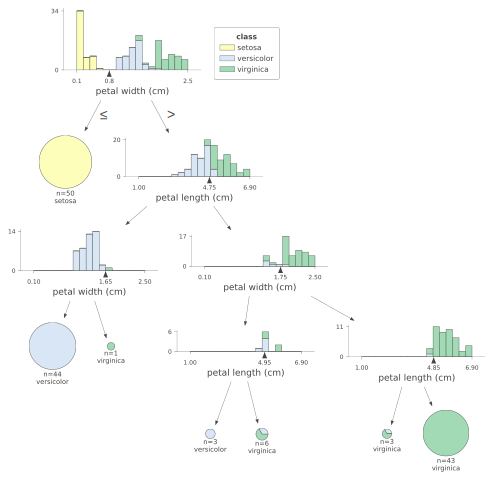

In [55]:
# Visualize the decision tree
viz = dtreeviz.model(clf, X, y,
               target_name='class',
               feature_names=iris.feature_names,
               class_names=list(iris.target_names))
viz.view()